# SIRD Model

We divide the population $N$ into four *compartments* that vary as a function of time $t$, 

- $S(t)$ are those susceptible but not yet infected with the disease
- $I(t)$ is the number of infectious individuals 
- $R(t)$ are those individuals who have recovered from the disease and now have immunity to it
- $D(t)$ is the number of people who have died from the disease. 

!pip install --upgrade jupyterthemes
!jt -t oceans16

## a. System of equations

$$\frac{\mathrm{d}S}{\mathrm{d}t} = -\frac{\beta IS}{N}$$

$$\frac{\mathrm{d}I}{\mathrm{d}t} = \frac{\beta IS}{N} -\gamma I -\mu I$$

$$\frac{\mathrm{d}R}{\mathrm{d}t} = \gamma I$$

$$\frac{\mathrm{d}D}{\mathrm{d}t} = \mu I$$

where $\beta, \gamma, \mu$ are the rates of infection, recovery, and mortality, respectively.

## b. Effect of Reproduction rate $R_0$ and mortality rate $\mu$

Reproduction number is given by, $$R_0 = \frac{\beta}{\gamma + \mu}$$

In [238]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
plt.style.use('seaborn-pastel')

First let us define a class that can do our job. 

In [239]:
class SIRDModel:
    
    def __init__(self, beta, gamma, mu, days, val, var):
        # Total population, N.
        self.N = 1000
        # Initial number of infected, recovered and dead individuals, I0, R0 and D0.
        self.I0, self.R0, self.D0 = 1, 0, 0
        # Everyone else, S0, is susceptible to infection initially.
        self.S0 = self.N - self.I0 - self.R0 - self.D0
        # Contact rate, beta, mean recovery rate, gamma, and mortality rate, mu (in 1/days).
        self.beta, self.gamma, self.mu = beta, gamma, mu
        # A grid of time points (in days)
        self.t = np.arange(days)
        self.val = val
        self.var = var
    
    def deriv(self, y, t, N, beta, gamma, mu):
        """The SIRD model differential equations"""
        S, I, R, D = y
        dSdt = -beta * S * I / N
        dIdt = beta * S * I / N - gamma * I - mu * I
        dRdt = gamma * I
        dDdt = mu * I
        return dSdt, dIdt, dRdt, dDdt
    
    def plot_sird(self, S, I, R, D):
        """Plot the data on four separate curves for S(t), 
        I(t), R(t) and D(t)""" 
        fig = plt.figure(figsize=[10,6], facecolor='w')
        ax = fig.add_subplot(111, axisbelow=True)
        ax.plot(self.t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
        ax.plot(self.t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
        ax.plot(self.t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
        ax.plot(self.t, D/1000, 'black', alpha=0.5, lw=2, label='Dead')
        ax.set_xlabel('Days')
        ax.set_ylabel('Number (1000s)')
        ax.set_ylim(0,1.2)
        ax.yaxis.set_tick_params(length=0)
        ax.xaxis.set_tick_params(length=0)
        ax.grid(b=True, which='major', c='w', lw=2, ls='-')
        legend = ax.legend()
        legend.get_frame().set_alpha(0.5)
        for spine in ('top', 'right', 'bottom', 'left'):
            ax.spines[spine].set_visible(False)
        plt.title(f'SIRD Model for ${self.var}={self.val}$', loc='center', fontsize=16, fontweight="bold")
        plt.show()
    
    def __main__(self):
        y0 = self.S0, self.I0, self.R0, self.D0
        ret = odeint(self.deriv, y0, self.t, args=(self.N, self.beta, self.gamma, self.mu))
        S, I, R, D = ret.T
        self.plot_sird(S, I, R, D)

Using the default parameters, $R_0 = 2$ and $\mu = 1\%$. 

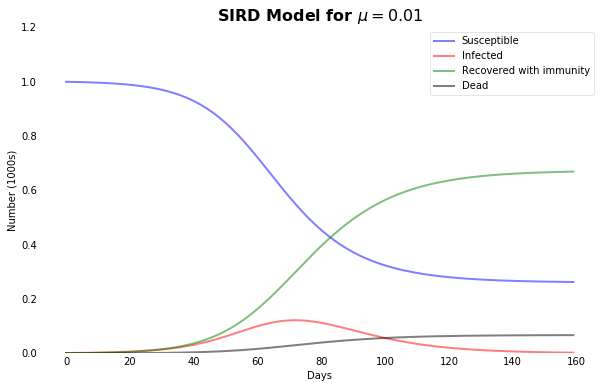

In [240]:
SIRDModel(beta=0.2, gamma=0.1, mu=0.01, days=160,val = 0.01,var='\mu').__main__()

Now we shall vary the params and understnd the effects
Varying $mu$ in the range of $[0.1\%,4.0\%]$

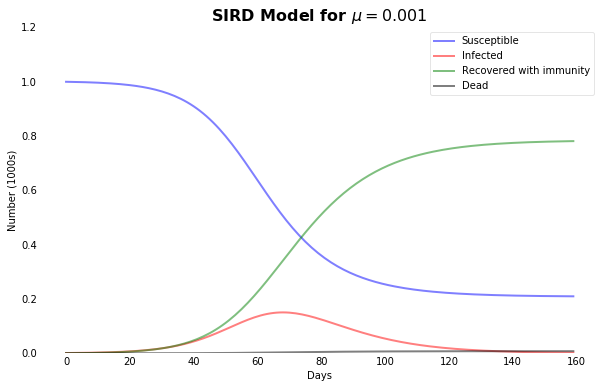

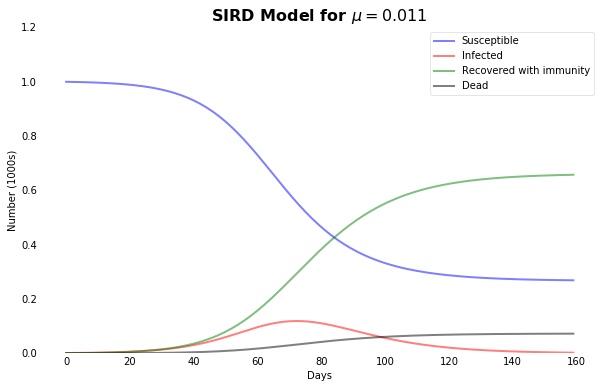

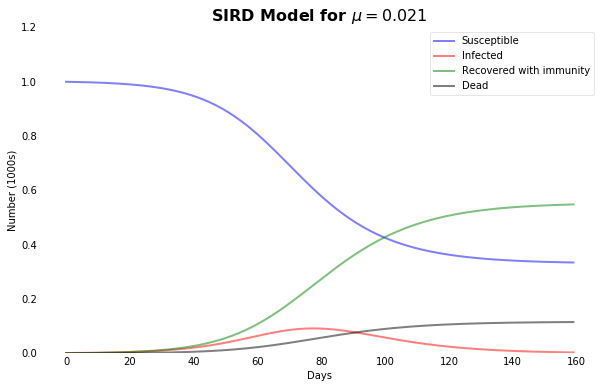

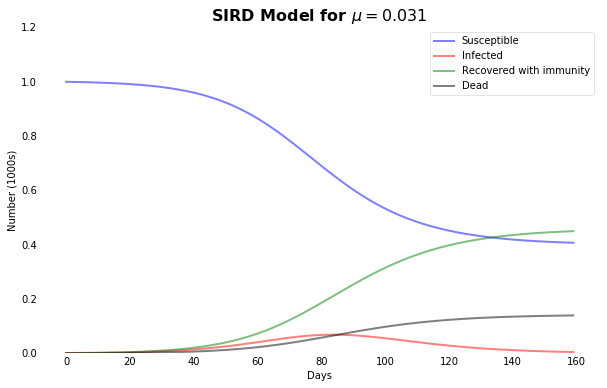

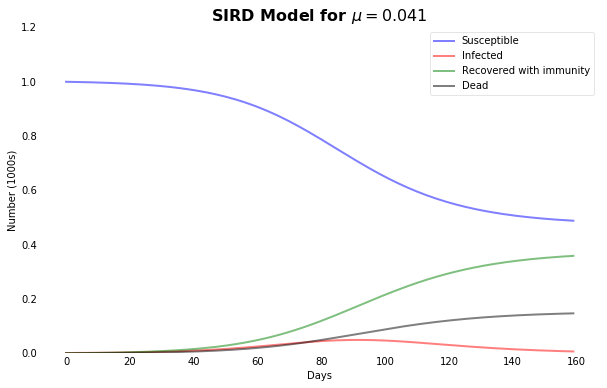

In [241]:
for mu in mu_val_range:
     SIRDModel(beta=0.2, gamma=0.1, mu=mu, days=160,val = mu,var='\mu').__main__()

Similarly $'\gamma'$ depends on R
varying $'\gamma'$ in the range of R $ \in [1.1\%,6.0\%]$

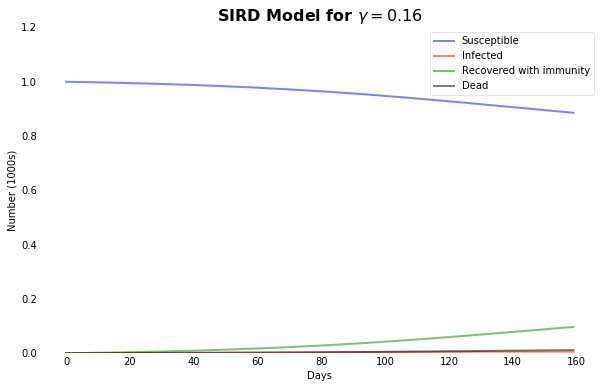

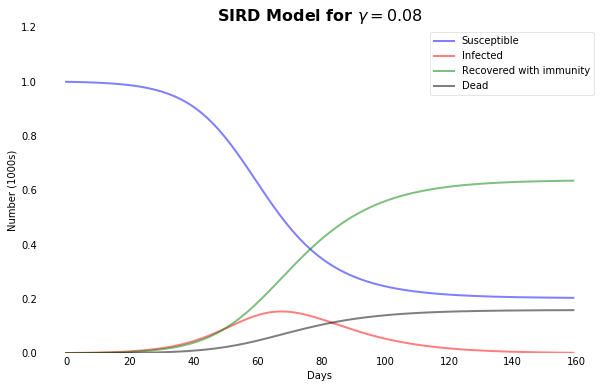

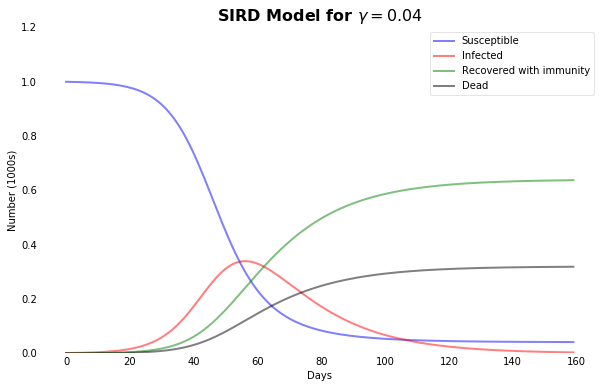

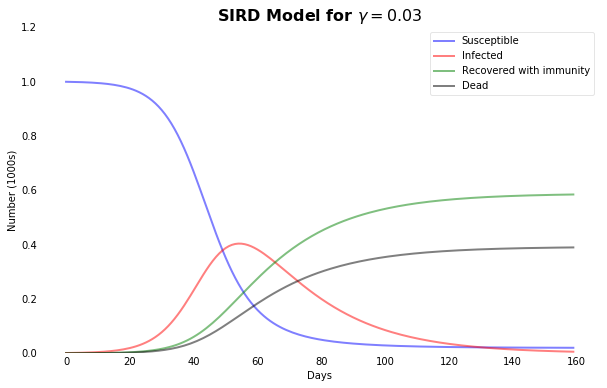

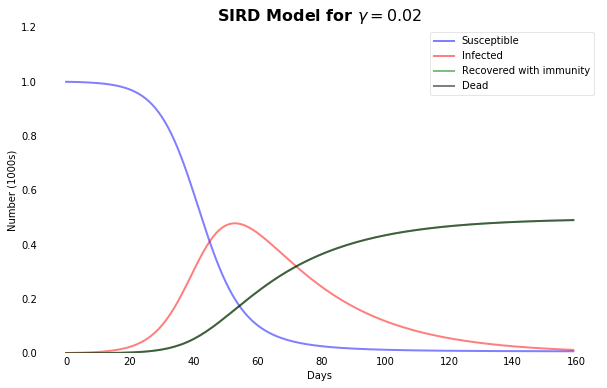

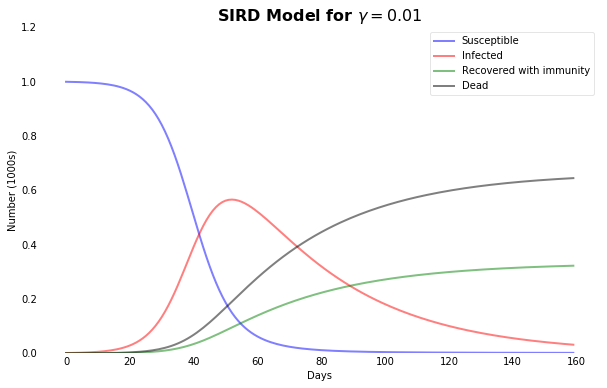

In [242]:
mu = 0.02
beta = 0.2
gamma_val_range = np.round(beta/np.arange(1.1, 6.9, 1) - mu, 2)
for gamma in gamma_val_range:
   SIRDModel(beta=0.2, gamma=gamma, mu=mu, days=160,val = gamma,var='\gamma').__main__()

Now we shall vary the params and understnd the effects
Varying $'\beta'$ in the range of R $[1.1\%,6.0\%]$

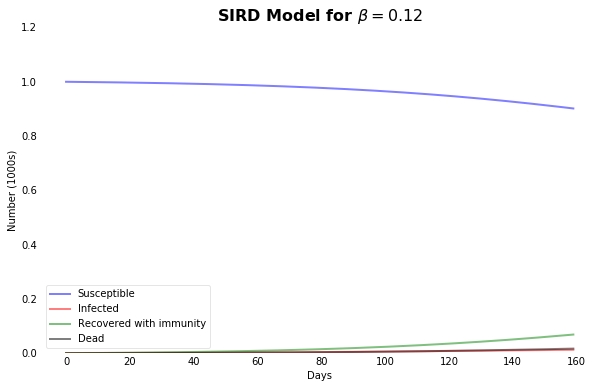

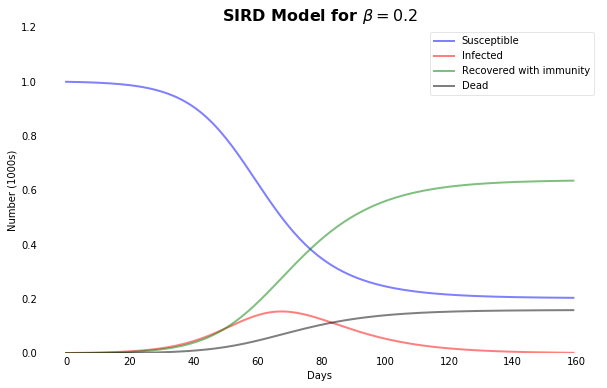

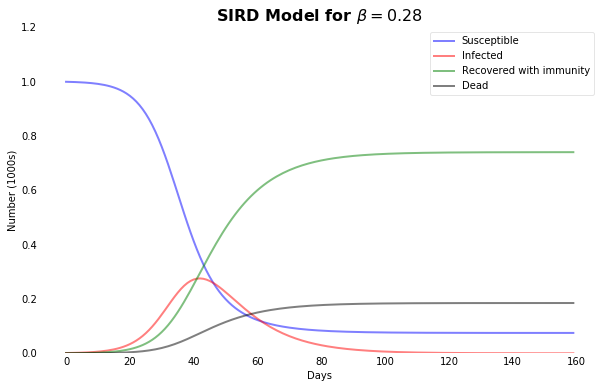

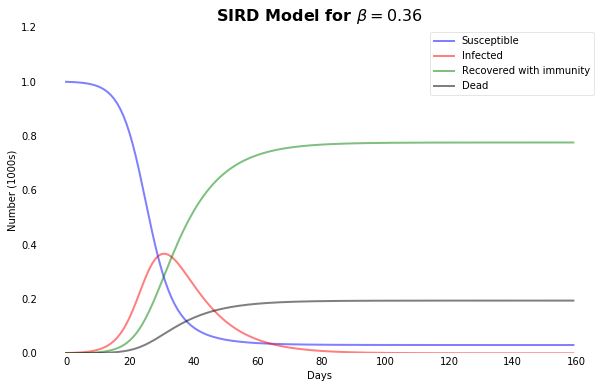

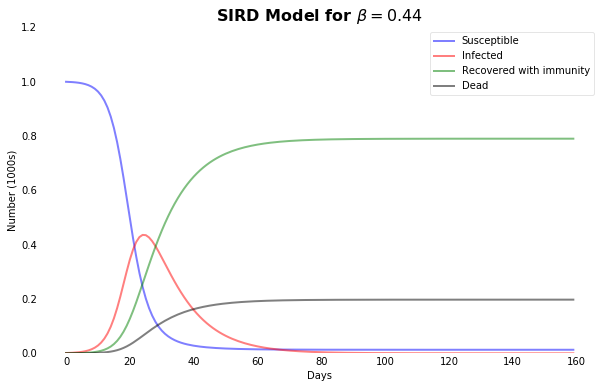

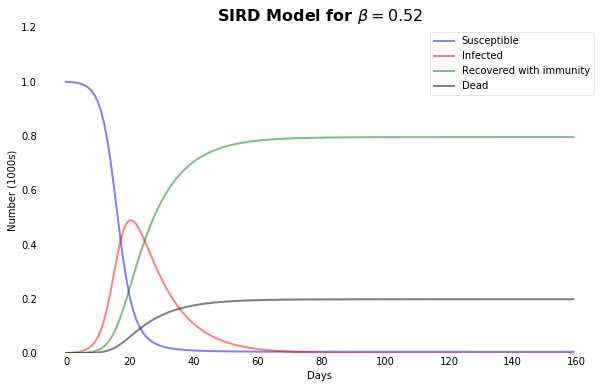

In [243]:
mu = 0.02
gamma = 0.08
beta_val_range = np.round(np.arange(1.5, 6.9, 1)*gamma, 2)
for beta in beta_val_range:
   SIRDModel(beta=beta, gamma=0.08, mu=mu, days=160,val = beta,var='\\beta').__main__()

### High Beta $'\beta = 0.65'$

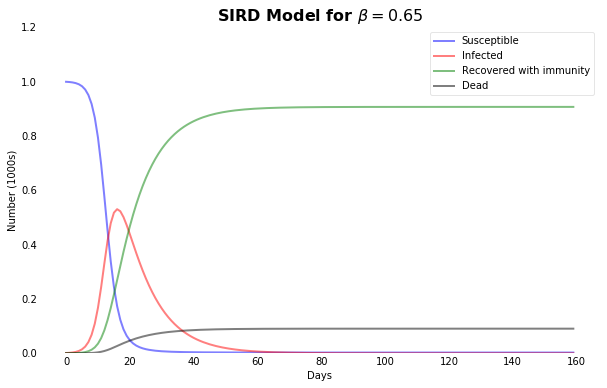

In [244]:
SIRDModel(beta=0.65, gamma=0.1, mu=0.01, days=160, val=0.65, var='\\beta').__main__()

As population increases towards high beta recovery rate also increases and infected rate drops significantly

### Low Beta $'\beta = 0.15'$

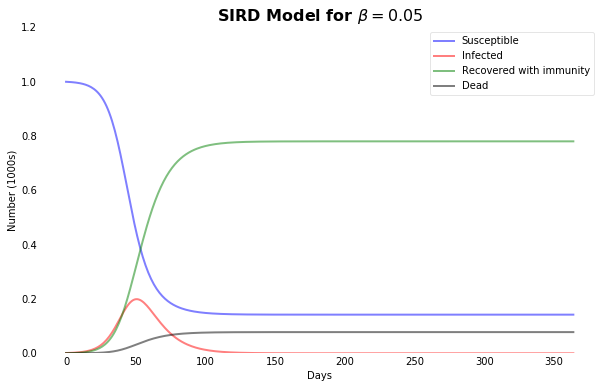

In [236]:
SIRDModel(beta=0.25, gamma=0.1, mu=0.01, days=365, val=0.05, var='\\beta').__main__()

Low infection rate drop leads to low death count i.e can be supposingly though of lock down

In [121]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from IPython.display import display, Math, Latex
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from matplotlib import pyplot
from matplotlib.colors import ListedColormap
from mpl_toolkits import mplot3d
from sklearn.datasets import make_classification, make_gaussian_quantiles
from sklearn.metrics import accuracy_score

In [122]:
# FUnction to plot decison boundaries
def plot_decision_regions(X, y, classifier, resolution=0.01):
    # Does not work....always....Setup marker generator and color map: FIXED!
    markers = ('s', 'v', 'o','p') 
    colors = ('r', 'b', 'g','y')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    # Z is the prediction of the class, given point in plane
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    # Z=f(xx1,yy1), plot classes in plane using color map but opaque
    plt.contourf(xx1, xx2, Z, alpha=0.2, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot data points, given labels
    for idx, cl in enumerate(np.unique(y)):
        #print(idx)
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=[cmap(idx)],
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

First make seperable data

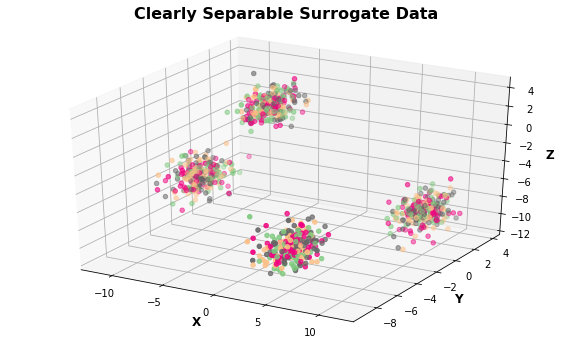

In [123]:
# generate 2d classification dataset
X, Y = make_blobs(n_samples=1000, centers=4, n_features=3,random_state=16)
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection="3d")
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=y,cmap='Accent')
plt.xlabel('X', fontsize=12, fontweight="bold")
plt.ylabel('Y', fontsize=12, fontweight="bold")
ax.set_zlabel('Z', fontsize=12, fontweight="bold")
plt.title('Clearly Separable Surrogate Data\n', loc='center', fontsize=16, fontweight="bold")
plt.show()

This is data with overlapping clusters

In [124]:
X1, Y1 = make_classification(n_features=3, n_redundant=1, n_informative=2,
                             n_clusters_per_class=1, n_classes=4, random_state=0)

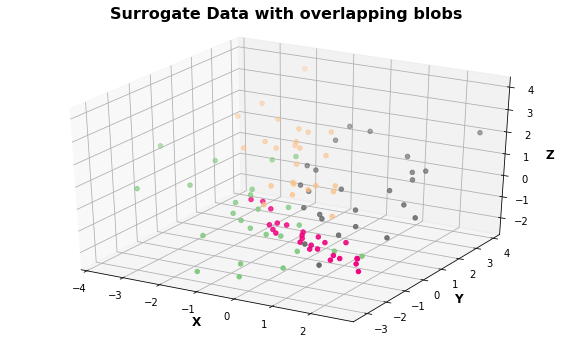

In [125]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection="3d")
ax.scatter3D(X1[:, 0], X1[:, 1], X1[:, 2], c=Y1, cmap='Accent')
plt.xlabel('X', fontsize=12, fontweight="bold")
plt.ylabel('Y', fontsize=12, fontweight="bold")
ax.set_zlabel('Z', fontsize=12, fontweight="bold")
plt.title('Surrogate Data with overlapping blobs\n', loc='center', fontsize=16, fontweight="bold")
plt.show()

Now performing PCA dimensionality reduction

In [127]:
#X, y = dX.iloc[:, 0:3].values, df.iloc[:, 3].values
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, stratify=Y, random_state=0)

# Standardize the features (zero mean, unit variance) 
sc = StandardScaler()

# Fit results must be used later (mu and sigma)
X_train_std = sc.fit_transform(X_train) 

# Normalize test data set with mu/sigma of training data
X_test_std = sc.transform(X_test)

(70, 3)
[-2.22044605e-16  1.04730874e+00  1.99616952e+00] [[ 0.36664877 -0.86704914 -0.33733435]
 [-0.61152548 -0.49785305  0.61496255]
 [ 0.70114569  0.01918671  0.71275985]]
[0.6558842695519167, 0.34411573044808336, -7.295751304679601e-17]


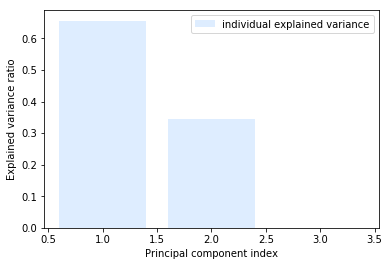

In [165]:
# Compute covariance matrix and eigenvalues (EVal) / eigenvectors (EVec)
print (X_train.shape)
cov_mat = np.cov(X_train_std.T) #cov matrix from data
EVal, EVec = np.linalg.eig(cov_mat)
# Calculate (sum of) explained variances
var_exp = [(i / sum_EVal) for i in sorted(EVal, reverse=True)]
# Plot explained variances
plt.bar(range(1,4), var_exp, alpha=0.3, align='center', label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [171]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(EVal[i]), EVec[:, i]) for i in range(len(EVal))]

# Sort the (EVal, EVec) tuples from high to low (reverse), key=EV
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
# Construct matrix w
# stacking, reshaping, adding dim of arrays
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis],eigen_pairs[2][1][:, np.newaxis]))
print(w)
#the above code is equivalent to that one (using reshape)
#w = np.hstack((eigen_pairs[0][1].reshape(13,1), eigen_pairs[1][1].reshape(13,1)))
#print(w)

[[-0.33733435 -0.86704914  0.36664877]
 [ 0.61496255 -0.49785305 -0.61152548]
 [ 0.71275985  0.01918671  0.70114569]]


In [168]:
# Transform the entire (training) data to the PCA space, X'=X.W
X_train_pca = X_train_std.dot(w)
print (X_train_std.shape, w.shape)

(70, 3) (3, 3)


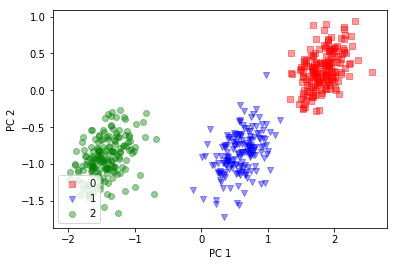

In [131]:
# Visualize the data
colors = ['r', 'b', 'g']
markers = ['s', 'v', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], # Pick x component for label
                X_train_pca[y_train==l, 1], 
                color=c, label=l, marker=m, alpha=0.4) 
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

Now running a logistic regression classifier

In [132]:
# Set up PCA and logistic regression model
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='ovr', solver='liblinear')

# Fit and transform training data, given on PCA reduction to k(=2) principle components
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
# solves task, given 3 classes (as from y_train) 
lr.fit(X_train_pca, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

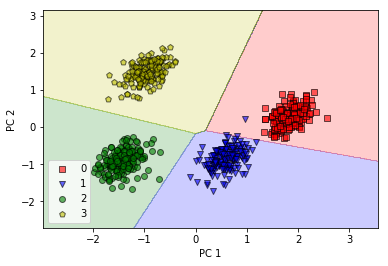

In [133]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

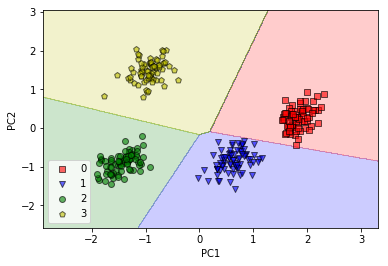

In [134]:
# plot decision regions for test set
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

In [135]:
y_pred = lr.predict(X_test_pca)
accuracy_score(y_test, y_pred)

1.0

We see the accuracy is quite good after PCA with 2 components

Now doing the same process in the case of overlapping data and performing the same operations

In [143]:
#X, y = dX.iloc[:, 0:3].values, df.iloc[:, 3].values
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X1, Y1, test_size=0.3, stratify=Y1, random_state=0)

# Standardize the features (zero mean, unit variance) 
sc = StandardScaler()

# Fit results must be used later (mu and sigma)
X_train_std = sc.fit_transform(X_train) 

# Normalize test data set with mu/sigma of training data
X_test_std = sc.transform(X_test)

(70, 3)


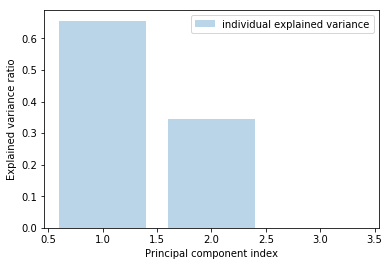

In [144]:
# Compute covariance matrix and eigenvalues (EVal) / eigenvectors (EVec)
print (X_train.shape)
cov_mat = np.cov(X_train_std.T) #cov matrix from data
EVal, EVec = np.linalg.eig(cov_mat)
# Calculate (sum of) explained variances
sum_EVal = sum(EVal)
var_exp = [(i / sum_EVal) for i in sorted(EVal, reverse=True)]

# Plot explained variances
plt.bar(range(1,4), var_exp, alpha=0.3, align='center', label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [166]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(EVal[i]), EVec[:, i]) for i in range(len(EVal))]

# Sort the (EVal, EVec) tuples from high to low (reverse), key=EV
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
# Construct matrix w
# stacking, reshaping, adding dim of arrays
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis],eigen_pairs[2][1][:, np.newaxis]))
print(w)

[[-0.33733435 -0.86704914  0.36664877]
 [ 0.61496255 -0.49785305 -0.61152548]
 [ 0.71275985  0.01918671  0.70114569]]


In [146]:
# Transform the entire (training) data to the PCA space, X'=X.W
X_train_pca = X_train_std.dot(w)
print (X_train_std.shape, w.shape)

(70, 3) (3, 2)


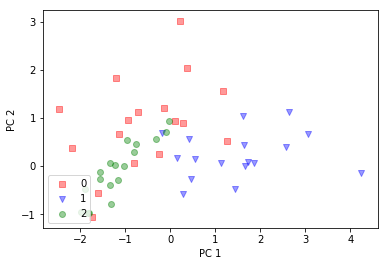

In [147]:
# Visualize the data
colors = ['r', 'b', 'g']
markers = ['s', 'v', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], # Pick x component for label
                X_train_pca[y_train==l, 1], 
                color=c, label=l, marker=m, alpha=0.4) 
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

In [148]:
# Set up PCA and logistic regression model
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='ovr', solver='liblinear')

# Fit and transform training data, given on PCA reduction to k(=2) principle components
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
# solves task, given 3 classes (as from y_train) 
lr.fit(X_train_pca, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

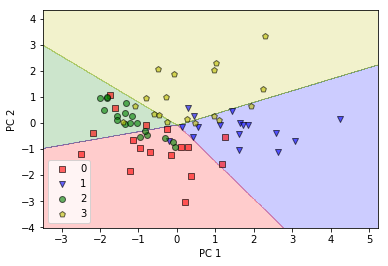

In [149]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

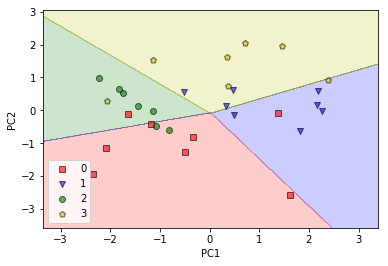

In [150]:
# plot decision regions for test set
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

In [151]:
y_pred = lr.predict(X_test_pca)
accuracy_score(y_test, y_pred)

0.7

The accuracy is quite poor in case of overlapping